# PyThon Data Science Toolbox (Part 2)
Link: https://learn.datacamp.com/courses/python-data-science-toolbox-part-2

## Course Agenda - What you will learn
* **Iterators**
  * Definition of Iterators
    * Iterators vs. iterables
  * Iterating over iterables, lists, dictionaries and files
  * Using ```for``` loop
  * Using ```enumerate()```
  * Using ```zip()```
  * Iterating over large data files, chunks by chunk
* **List comprehensions and generators**
  * What they are
  * Creating list comprehension
  * Conditionals in comprehensions (use of ```if``` and ```if-else```)
  * Generator expressions
  * Generator functions

## Iterators
* As iterator is an object that keeps state.
* Applying ```next()``` over an iterator produces the next value of the iterable object.
* Can be used with ```for``` loop. When using the ```for``` loop what really happens is:
  1. Takes the objects iterable;
  2. Creates the associated iterable object;
  3. Iterates over it.
* So internally, the for loop creates an iterator object, ```iter_obj``` by calling ```iter()``` on the iterable.

## Iterables
* Examples are lists, strings, dictionaries, file connections.
* It's an object with an associated ```iter()``` method.
* An iterable is an object that can return an iterator.
* Applying ```iter()``` to an iterable creates an iterator.

## Creating and Iterator from an Iterable
1. From the iterable object, let's say, a list, dictionary, string, file, we create the iterator with ```iter()```.
2. Using ```next()``` over the iterator object will return each element of the iterable object, one by one.


In [0]:
# Simple iteration
wizards = ['Harry', 'Rony', 'Hermione']
for wizard in wizards: # Iterate over list
    print(wizard)
    for letter in wizard: # Iterate over string
        print(letter)

Harry
H
a
r
r
y
Rony
R
o
n
y
Hermione
H
e
r
m
i
o
n
e


In [0]:
# Creating and iterator from an iterable
country = 'BR' # Iterable object

# Using next()
iterator = iter(country) # Creates iterator
print("Using next()")
print(next(iterator))
print(next(iterator))

# Using for loop (uses next() internally)
iterator = iter(country)
print("Using for loop")
for letter in iterator:
    print(letter)

Using next()
B
R
Using for loop
B
R
Using *
B R


## Using * to iterate all elements at once
* Also called splat operator.
* Using the * character before the iterator object will make the iteration over all elements of the iterable object at once.

In [0]:
# Using * (iterate all at once)
name = 'João Gross' # Iterable object
iterator = iter(name) # Iterator object
print(*iterator) # Iterate all at once

J o ã o   G r o s s


In [0]:
games = {'RPG': 'Ni No Kuni', 'Puzzle': 'Ico'}
for key, value in games.items():
    print(key, ":", value)

RPG : Ni No Kuni
Puzzle : Ico


In [0]:
# Iteraing with range()
iterator = range(5) # range() create an iterable object
for value in iterator:
    print(value)

0
1
2
3
4


## Using ```enumerate()```
* Function that takes any iterable as argument, such as a list.
* Creates a list of pairs, each pair with an element of the original iterable and an index.
* The ```enumerate()``` object itself is also an iterable and we can iterate over it.

In [0]:
foods = ['hamburguer', 'pasta', 'lasagna', 'soup']
e = enumerate(foods)
print("Type:", type(e))

e_list = list(e)
print("List:", e_list)

for index, food in enumerate(foods):
    print(index, ":", food)

for index, food in enumerate(foods, start=100): # We can set another start value
    print(index, ":", food)

Type: <class 'enumerate'>
List: [(0, 'hamburguer'), (1, 'pasta'), (2, 'lasagna'), (3, 'soup')]
0 : hamburguer
1 : pasta
2 : lasagna
3 : soup
100 : hamburguer
101 : pasta
102 : lasagna
103 : soup


## Using ```zip()```
* Accepts an arbitrary number of iterables and returns an iterator of tuples.

In [0]:
games = ['GTA V', 'Ico', 'Shadow of the Colossus', 'The Last of Us']
ratings = [9.5, 8, 8.3, 10]

# Checking type
z = zip(games, ratings) # Creates iterator of tuples
print('Type:', type(z)) 

# Creating list from iterator
z_list = list(z)
print('List:', z_list)

print('\nListing values')
for game, rating in zip(games, ratings):
    print(game, ",", rating)

print('\nListing with indexes')
for index, pair in enumerate(zip(games, ratings)):
    print(index, "-", pair[0], ",", pair[1])

# Using * operator
z = zip(games, ratings)
print("\nAll elements:", *z)

# Unzip elements
z = zip(games, ratings)
games2, ratings2 = zip(*z)
print("Unziped:", games2, ratings2)


Type: <class 'zip'>
List: [('GTA V', 9.5), ('Ico', 8), ('Shadow of the Colossus', 8.3), ('The Last of Us', 10)]

Listing values
GTA V , 9.5
Ico , 8
Shadow of the Colossus , 8.3
The Last of Us , 10

Listing with indexes
0 - GTA V , 9.5
1 - Ico , 8
2 - Shadow of the Colossus , 8.3
3 - The Last of Us , 10

All elements: ('GTA V', 9.5) ('Ico', 8) ('Shadow of the Colossus', 8.3) ('The Last of Us', 10)
Unziped: ('GTA V', 'Ico', 'Shadow of the Colossus', 'The Last of Us') (9.5, 8, 8.3, 10)


## Using iterators to load large files into memory
* If data is too big, it can't be loaded into memory entirely.
* A chunk of data can be loaded, processed and discarded. 
* The process is repeated chunk over chunk until all the data has been analysed.

In [0]:
import pandas as pd

result = []
for chunk in pd.read_csv('data.csv', chunksize=1000):
    result.append(sum(chunk['x']))
total = sum(result)

print(total)


In [0]:
# Using functions, and chunk iterables
import pandas as pd

def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    return counts_dict

datapath = "/content/drive/My Drive/Colab Notebooks/datasets/tweets.csv"
result_counts = count_entries(datapath, 10, 'lang')

print(result_counts)

{'en': 97, 'et': 1, 'und': 2}


# List Comprehensions

* Let's say you want to create another version of one list that holds all the first list numbers multiplied by 2. What you could do:
  1. Create a new empty list;
  2. Iterate over the elements of the first list in a for loop;
  3. For each element, multiply it by 2;
  4. Add the element in the new list.

```
numbers = [5, 10, 15, 20, 25]
number_by_2 = []
for number in numbers:
    number_by_2.append(number*2)
print(number_by_2)
> [10, 20, 30, 40, 50]
```

* It works fine, but it's not very efficient. Also, this approach takes more code space.
* A solution is using list comprehensions, and we can perform the task shown above in a single line of code.

```
numbers = [5, 10, 15, 20, 25]
number_by_2 = [number*2 for number in numbers]
print(number_by_2)
> [10, 20, 30, 40, 50]
```

## In summary
* List comprehension can be used over any iterable object
* They collapse for loops for building lists into a single line
* Required components
  * Iterable object: list, dictionary, string, etc
  * Iterator variable that represents the memebrs of iterable
  * Output expression
  
  ```[``` *\[output expression\]* ```for``` *iterator variable* ```in``` *iterable*```]```

* One of the trade-offs is readability, because long list comprehensions can be difficult to read

In [0]:
# Use of list comphrehensions and executoon time

import pandas as pd
import time

numbers = range(10**2)
df = pd.DataFrame({"type":[], "time":[]})

for iteration in range(1000):
    # Without list comprehension
    start = time.time()
    numbers_multiplied = []
    for number in numbers:
        numbers_multiplied.append(number*2)
    end = time.time()
    df = df.append({"type":"no-comprehension", "time":end-start}, ignore_index=True)

    # Without list comprehension
    start = time.time()
    numbers_multiplied2 = [number*2 for number in numbers]
    end = time.time()
    df = df.append({"type":"with-comprehension", "time":end-start}, ignore_index=True)

print(df.groupby("type").mean())

                        time
type                        
no-comprehension    0.000018
with-comprehension  0.000009


In [0]:
# List comprehensions in nested for loops

random_pairs = []
for a in range(0, 3):
    for b in range(10,13):
        random_pairs.append((a, b))
print(random_pairs)

random_pairs2 = [(a, b) for a in range(0, 3) for b in range(10,13)]
print(random_pairs2)


[(0, 10), (0, 11), (0, 12), (1, 10), (1, 11), (1, 12), (2, 10), (2, 11), (2, 12)]
[(0, 10), (0, 11), (0, 12), (1, 10), (1, 11), (1, 12), (2, 10), (2, 11), (2, 12)]


In [0]:
# Creating a matrix n x n
size = 10
matrix = [[col for col in range(size)] for row in range(size)]

# Print matrix
for row in matrix:
    print(row)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Conditionals in comprehensions

* Expressions with ```if```
* Expressions with ```if``` and ```else```
* Use of dictionaries

In [0]:
# Using If
list_even = [num for num in range(10) if num % 2 == 0]
list_odd = [num for num in range(10) if num % 2 == 1]
print("List even:", list_even)
print("List odd:", list_odd)

# Using If-Else
list_numbers = [(num, "even") if num % 2 == 0 else (num, "odd") for num in range(10)]
print("List numbers:")
for i in list_numbers: print(i)

# Using dictionaries
fractions = {num: "*" if num == 0 else 1/num for num in range(10)}
print("My dictionary:")
for key, value in fractions.items(): print(key, ("1/"+str(key)+" ="), value)

List even: [0, 2, 4, 6, 8]
List odd: [1, 3, 5, 7, 9]
List numbers:
(0, 'even')
(1, 'odd')
(2, 'even')
(3, 'odd')
(4, 'even')
(5, 'odd')
(6, 'even')
(7, 'odd')
(8, 'even')
(9, 'odd')
My dictionary:
0 1/0 = *
1 1/1 = 1.0
2 1/2 = 0.5
3 1/3 = 0.3333333333333333
4 1/4 = 0.25
5 1/5 = 0.2
6 1/6 = 0.16666666666666666
7 1/7 = 0.14285714285714285
8 1/8 = 0.125
9 1/9 = 0.1111111111111111


## Generator expressions
* Similar to list comprehension.
* It returns a **generator object**, instead of a list when using list comprehension.
* A generator object can be iterated over.
* Declaration uses ```()``` instead of ```[]```.

In [0]:
# Creating a generator expression - accessing values
result = (num for num in range(10))
for num in result:
    print(num)

0
1
2
3
4
5
6
7
8
9


In [0]:
# Creating a generator expression - creating a list
result = (num**10 for num in range(10))
print(list(result))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
generator = (num**2 for num in range(100))
my_list = []
print("Start")
while(True):
    try:
        my_list.append(next(generator))
        print(len(my_list), my_list[-1])
    except:
        print("End")
        break

Start
1 0
2 1
3 4
4 9
5 16
6 25
7 36
8 49
9 64
10 81
11 100
12 121
13 144
14 169
15 196
16 225
17 256
18 289
19 324
20 361
21 400
22 441
23 484
24 529
25 576
26 625
27 676
28 729
29 784
30 841
31 900
32 961
33 1024
34 1089
35 1156
36 1225
37 1296
38 1369
39 1444
40 1521
41 1600
42 1681
43 1764
44 1849
45 1936
46 2025
47 2116
48 2209
49 2304
50 2401
51 2500
52 2601
53 2704
54 2809
55 2916
56 3025
57 3136
58 3249
59 3364
60 3481
61 3600
62 3721
63 3844
64 3969
65 4096
66 4225
67 4356
68 4489
69 4624
70 4761
71 4900
72 5041
73 5184
74 5329
75 5476
76 5625
77 5776
78 5929
79 6084
80 6241
81 6400
82 6561
83 6724
84 6889
85 7056
86 7225
87 7396
88 7569
89 7744
90 7921
91 8100
92 8281
93 8464
94 8649
95 8836
96 9025
97 9216
98 9409
99 9604
100 9801
End


## Generator Functions
* Produces generator objects when called
* Defined like a regular function using ```def```
* Yields a sequence of values instead of returning a single value
  * Generates a value with ```yield``` keyword

In [9]:
def create_squares(n):
    """Generate squares from 1 to n (included)."""
    square = 1
    while square <= n:
        yield square**2
        square += 1

result = create_squares(10)
print("Type:", type(result))
print("List of squares:")
for index, square in enumerate(result, start=1):
    print(index, square)


Type: <class 'generator'>
List of squares:
1 1
2 4
3 9
4 16
5 25
6 36
7 49
8 64
9 81
10 100


In [13]:
# Case study - Opening file and reading chunks of data
with open('/content/drive/My Drive/Colab Notebooks/datasets/world_ind_pop_data.csv') as file:

    # Skip the column names
    file.readline()

    counts_dict = {}
    for j in range(1000):
        line = file.readline().split(',')
        first_col = line[0]
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

print(counts_dict)

{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

In [0]:
# Case study - Using generator function

def read_large_file(file_object):
    """A generator function to read a large file lazily."""
    while True:
        data = file_object.readline()
        if not data:
            break
        yield data

counts_dict = {}
with open('/content/drive/My Drive/Colab Notebooks/datasets/world_ind_pop_data.csv') as file:
    
    # Iterate over the generator function
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1 

# Print           
for key, count in counts_dict.items():
    print(key, ":", count)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


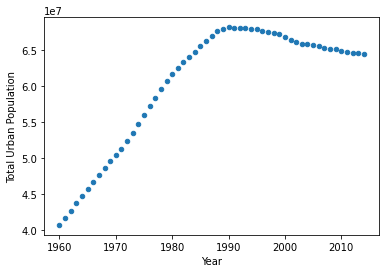

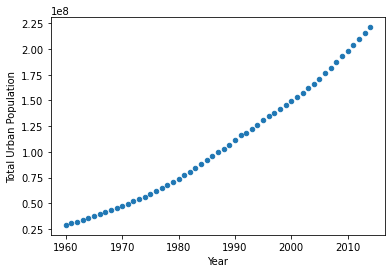

In [37]:
# Case Study - Using streaming data chunk by chunk and list comprehension
def plot_pop(filename, country_code):

    # Initialize reader object
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename
filename = '/content/drive/My Drive/Colab Notebooks/datasets/world_ind_pop_data.csv'
plot_pop(filename, 'CEB')
plot_pop(filename, 'ARB')

# Course conclusion - What we have learned
* User-defined functions
* Iterators
* List comprehensions
* Generators